In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

0.1%

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [2]:
loss_fn = nn.CrossEntropyLoss()

In [16]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    sum_loss = 0
    
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [17]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

In [18]:
def run_training(epochs, train_dataloader, model, loss_fn, optimizer):
    test_loss = []
    train_loss = []
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        sum_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        train_loss.append(sum_loss)

        acc, avg_loss = test_loop(test_dataloader, model, loss_fn)
        test_loss.append(avg_loss)
    print("Done!")
    
    return test_loss

In [ ]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

In [22]:
learning_rate = 1e-3
batch_size = 64
epochs = 50

In [23]:
#SGD
model_sgd = NeuralNetwork()
optimizer_sgd = torch.optim.SGD(model_sgd.parameters(), lr=learning_rate)
train_loss_sgd = run_training(epochs, train_dataloader, model_sgd, loss_fn, optimizer_sgd)

Epoch 1
-------------------------------
loss: 2.308702  [   64/60000]
loss: 2.298893  [ 6464/60000]
loss: 2.278615  [12864/60000]
loss: 2.270220  [19264/60000]
loss: 2.262533  [25664/60000]
loss: 2.226739  [32064/60000]
loss: 2.230530  [38464/60000]
loss: 2.201737  [44864/60000]
loss: 2.205233  [51264/60000]
loss: 2.165535  [57664/60000]
Test Error: 
 Accuracy: 42.9%, Avg loss: 2.166279 

Epoch 2
-------------------------------
loss: 2.176350  [   64/60000]
loss: 2.169537  [ 6464/60000]
loss: 2.113688  [12864/60000]
loss: 2.127780  [19264/60000]
loss: 2.082239  [25664/60000]
loss: 2.016465  [32064/60000]
loss: 2.046087  [38464/60000]
loss: 1.970422  [44864/60000]
loss: 1.984919  [51264/60000]
loss: 1.906351  [57664/60000]
Test Error: 
 Accuracy: 57.7%, Avg loss: 1.909102 

Epoch 3
-------------------------------
loss: 1.938139  [   64/60000]
loss: 1.912098  [ 6464/60000]
loss: 1.796420  [12864/60000]
loss: 1.838495  [19264/60000]
loss: 1.724202  [25664/60000]
loss: 1.668699  [32064/600

In [26]:
#RMSprop
model_rmsprop = NeuralNetwork()
optimizer_rmsprop = torch.optim.RMSprop(model_rmsprop.parameters(), lr=learning_rate, alpha=0.9)
train_loss_rmsprop = run_training(epochs, train_dataloader, model_rmsprop, loss_fn, optimizer_rmsprop)

Epoch 1
-------------------------------
loss: 2.307733  [   64/60000]
loss: 0.567378  [ 6464/60000]
loss: 0.455436  [12864/60000]
loss: 0.487886  [19264/60000]
loss: 0.495986  [25664/60000]
loss: 0.426267  [32064/60000]
loss: 0.390355  [38464/60000]
loss: 0.540903  [44864/60000]
loss: 0.536123  [51264/60000]
loss: 0.442710  [57664/60000]
Test Error: 
 Accuracy: 82.5%, Avg loss: 0.468693 

Epoch 2
-------------------------------
loss: 0.268569  [   64/60000]
loss: 0.343457  [ 6464/60000]
loss: 0.287932  [12864/60000]
loss: 0.349407  [19264/60000]
loss: 0.348416  [25664/60000]
loss: 0.421007  [32064/60000]
loss: 0.274383  [38464/60000]
loss: 0.433708  [44864/60000]
loss: 0.423908  [51264/60000]
loss: 0.399390  [57664/60000]
Test Error: 
 Accuracy: 83.9%, Avg loss: 0.448884 

Epoch 3
-------------------------------
loss: 0.236915  [   64/60000]
loss: 0.342528  [ 6464/60000]
loss: 0.187007  [12864/60000]
loss: 0.322015  [19264/60000]
loss: 0.319843  [25664/60000]
loss: 0.417956  [32064/600

In [25]:
#Adam
model_adam = NeuralNetwork()
optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=learning_rate)
train_loss_adam = run_training(epochs, train_dataloader, model_adam, loss_fn, optimizer_adam)

Epoch 1
-------------------------------
loss: 2.300333  [   64/60000]
loss: 0.564000  [ 6464/60000]
loss: 0.382698  [12864/60000]
loss: 0.503467  [19264/60000]
loss: 0.465193  [25664/60000]
loss: 0.447979  [32064/60000]
loss: 0.376158  [38464/60000]
loss: 0.521069  [44864/60000]
loss: 0.462810  [51264/60000]
loss: 0.507837  [57664/60000]
Test Error: 
 Accuracy: 84.1%, Avg loss: 0.433828 

Epoch 2
-------------------------------
loss: 0.282212  [   64/60000]
loss: 0.370827  [ 6464/60000]
loss: 0.276196  [12864/60000]
loss: 0.358309  [19264/60000]
loss: 0.443311  [25664/60000]
loss: 0.394429  [32064/60000]
loss: 0.321325  [38464/60000]
loss: 0.494593  [44864/60000]
loss: 0.412473  [51264/60000]
loss: 0.439821  [57664/60000]
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.408601 

Epoch 3
-------------------------------
loss: 0.226014  [   64/60000]
loss: 0.352386  [ 6464/60000]
loss: 0.231508  [12864/60000]
loss: 0.347898  [19264/60000]
loss: 0.373314  [25664/60000]
loss: 0.349129  [32064/600

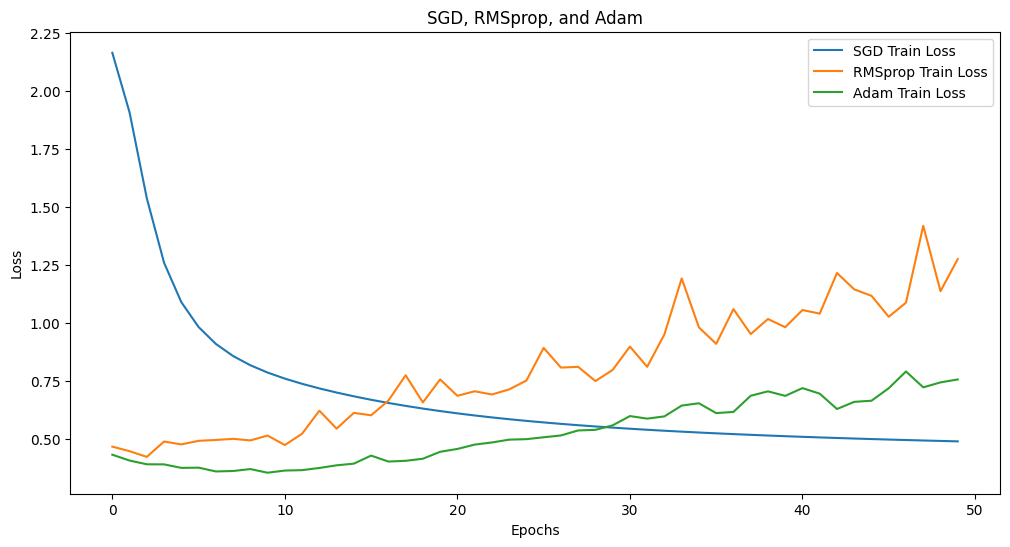

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), train_loss_sgd, label="SGD Train Loss")
plt.plot(range(epochs), train_loss_rmsprop, label="RMSprop Train Loss")
plt.plot(range(epochs), train_loss_adam, label="Adam Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD, RMSprop, and Adam")
plt.legend()
plt.show()

## Вывод
Оптимизатор SGD демонстрирует постепенное и стабильное снижение функции потерь с течением эпох, тогда как RMSprop и Adam быстро достигают низкого значения потерь в первые эпохи, но затем их поведение становится менее стабильным, особенно у RMSprop, где наблюдаются колебания и даже рост потерь.

Adam достигает минимального значения потерь быстрее, но также показывает незначительные колебания в конце.

В итоге, SGD хоть и медленнее, обеспечивает более устойчивую сходимость.